<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_data1_model_training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import torch
import torch.nn as nn

In [3]:
import torch.optim as optim

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [5]:
import matplotlib.pyplot as plt

In [6]:
file_path = '/content/logs_CAD_2024_1.xlsx' # Data from Excel
data = pd.read_excel(file_path)

In [7]:
display(pd.DataFrame(data))

,timestamp,user_id,tool_id,log_count,lesson,day_part
0,"15/04/24, 11:37:03",26861,233243,3.0,0,1
1,"15/04/24, 11:37:03",26861,233243,0.0,0,1
2,"15/04/24, 11:37:03",26861,233243,0.0,0,1
3,"15/04/24, 11:30:50",26861,2949,1.0,0,1
4,"15/04/24, 11:30:37",26861,244208,3.0,0,1
...,...,...,...,...,...,...
6091,"1/02/24, 20:00:42",29349,2949,0.0,0,3
6092,"29/01/24, 19:00:53",29349,2949,0.0,0,3
6093,"29/01/24, 19:00:52",29349,2949,0.0,0,3
6094,"29/01/24, 19:00:52",29349,2949,0.0,0,3


In [8]:
X = data.drop('timestamp', axis=1).values
y = data['timestamp'].values

In [9]:
y = (y == 1).astype(float) # target values are 0 or 1

In [10]:
#  Preprocess Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler() # Standardize features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [13]:
class SimpleNN(nn.Module): # define the Model
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        return x


In [14]:
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

In [15]:
criterion = nn.BCELoss()  # Loss Function and Optimizer for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
num_epochs = 100 # Train the Model
training_losses = []
validation_losses = []

In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class SimpleModel(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Ensure the output is in the range [0, 1]
        return x

In [25]:
import torch
import torch.optim as optim
import torch.nn as nn

In [26]:
# define the model
input_size = 10
hidden_size = 5
output_size = 1  #  for binary classification

model = SimpleModel(input_size, hidden_size, output_size)

In [27]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
# training data
X_train = torch.randn(100, input_size)
y_train = torch.randint(0, 2, (100, 1)).float()

In [29]:
X_test = torch.randn(30, input_size)  #  validation input
y_test = torch.randint(0, 2, (30, 1)).float()  #  binary labels

In [30]:
num_epochs = 100 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/100], Loss: 0.7270, Val Loss: 0.7021
Epoch [20/100], Loss: 0.7213, Val Loss: 0.6988
Epoch [30/100], Loss: 0.7162, Val Loss: 0.6960
Epoch [40/100], Loss: 0.7116, Val Loss: 0.6940
Epoch [50/100], Loss: 0.7075, Val Loss: 0.6925
Epoch [60/100], Loss: 0.7036, Val Loss: 0.6912
Epoch [70/100], Loss: 0.7002, Val Loss: 0.6903
Epoch [80/100], Loss: 0.6971, Val Loss: 0.6896
Epoch [90/100], Loss: 0.6942, Val Loss: 0.6894
Epoch [100/100], Loss: 0.6916, Val Loss: 0.6899


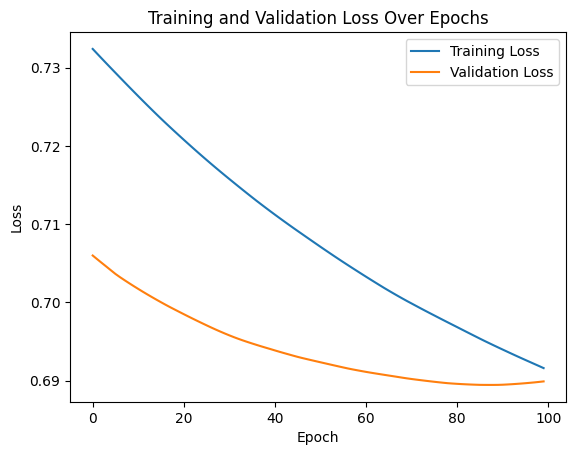

In [31]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

Training Loss: The loss value during the training process is decreasing over the epochs, starting from 0.7270 at epoch 10 and ending at 0.6916 at epoch 100.


Validation Loss: Similarly, the validation loss is also decreasing, starting from 0.7021 at epoch 10 and ending at 0.6899 at epoch 100.

Both training and validation losses steadily decrease over time, indicating that the model is learning and improving its predictions as the training progresses.

In [44]:
num_epochs = 200 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/200], Loss: 0.3180, Val Loss: 2.2648
Epoch [20/200], Loss: 0.3167, Val Loss: 2.2829
Epoch [30/200], Loss: 0.3153, Val Loss: 2.3044
Epoch [40/200], Loss: 0.3140, Val Loss: 2.3256
Epoch [50/200], Loss: 0.3128, Val Loss: 2.3458
Epoch [60/200], Loss: 0.3115, Val Loss: 2.3624
Epoch [70/200], Loss: 0.3102, Val Loss: 2.3770
Epoch [80/200], Loss: 0.3089, Val Loss: 2.3910
Epoch [90/200], Loss: 0.3077, Val Loss: 2.4048
Epoch [100/200], Loss: 0.3066, Val Loss: 2.4191
Epoch [110/200], Loss: 0.3055, Val Loss: 2.4326
Epoch [120/200], Loss: 0.3045, Val Loss: 2.4460
Epoch [130/200], Loss: 0.3035, Val Loss: 2.4581
Epoch [140/200], Loss: 0.3025, Val Loss: 2.4695
Epoch [150/200], Loss: 0.3015, Val Loss: 2.4807
Epoch [160/200], Loss: 0.3006, Val Loss: 2.4915
Epoch [170/200], Loss: 0.2996, Val Loss: 2.5021
Epoch [180/200], Loss: 0.2983, Val Loss: 2.5125
Epoch [190/200], Loss: 0.2971, Val Loss: 2.5244
Epoch [200/200], Loss: 0.2960, Val Loss: 2.5387


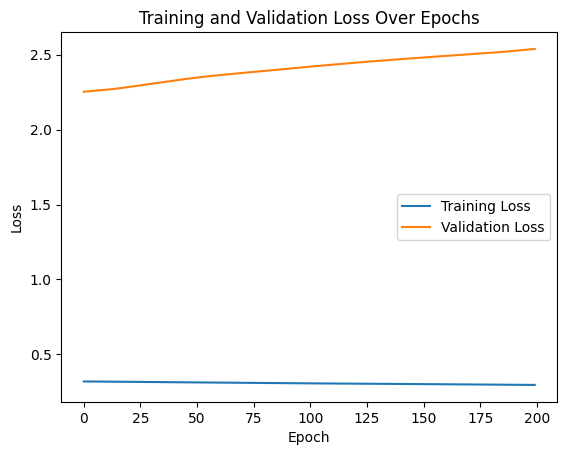

In [45]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [52]:
num_epochs = 500 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/500], Loss: 0.2650, Val Loss: 3.0424
Epoch [20/500], Loss: 0.2647, Val Loss: 3.0524
Epoch [30/500], Loss: 0.2643, Val Loss: 3.0620
Epoch [40/500], Loss: 0.2639, Val Loss: 3.0723
Epoch [50/500], Loss: 0.2635, Val Loss: 3.0816
Epoch [60/500], Loss: 0.2630, Val Loss: 3.0889
Epoch [70/500], Loss: 0.2624, Val Loss: 3.0946
Epoch [80/500], Loss: 0.2618, Val Loss: 3.0981
Epoch [90/500], Loss: 0.2613, Val Loss: 3.1018
Epoch [100/500], Loss: 0.2608, Val Loss: 3.1070
Epoch [110/500], Loss: 0.2602, Val Loss: 3.1109
Epoch [120/500], Loss: 0.2597, Val Loss: 3.1154
Epoch [130/500], Loss: 0.2592, Val Loss: 3.1187
Epoch [140/500], Loss: 0.2587, Val Loss: 3.1251
Epoch [150/500], Loss: 0.2582, Val Loss: 3.1312
Epoch [160/500], Loss: 0.2577, Val Loss: 3.1363
Epoch [170/500], Loss: 0.2572, Val Loss: 3.1429
Epoch [180/500], Loss: 0.2567, Val Loss: 3.1497
Epoch [190/500], Loss: 0.2563, Val Loss: 3.1566
Epoch [200/500], Loss: 0.2558, Val Loss: 3.1633
Epoch [210/500], Loss: 0.2554, Val Loss: 3.1707
E

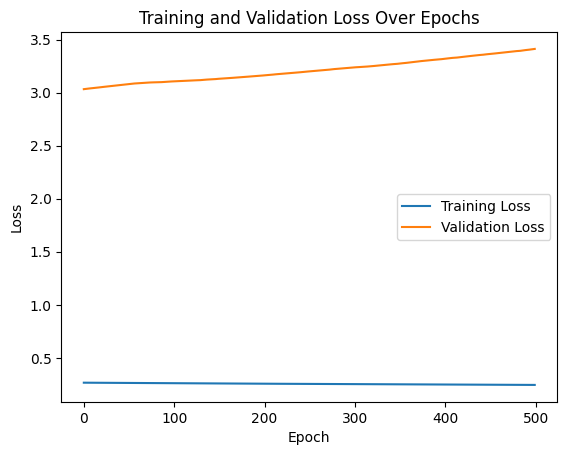

In [53]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

The training loss decreased from 0.2650 to 0.2444 over the course of 500 epochs.
This suggests that the model is learning and improving its performance on the training data.

The validation loss increased from 3.0424 to 3.4130.
This indicates that while the model is performing better on the training data, its performance on the validation data has deteriorated.

The increasing divergence between training and validation losses as epochs progress indicates overfitting.

In [32]:
model.eval() # evaluate the Model
with torch.no_grad():
    y_predicted = model(X_test).round()

In [33]:
unique_values = y_predicted.unique()
print(f'Unique values in predictions: {unique_values}')

Unique values in predictions: tensor([0., 1.])


The unique values tensor([0., 1.]) in the model's predictions indicate that the model is making binary predictions and can predict both classes.



In [59]:
# is y_test correctly shaped for sklearn's classification_report?
y_test_flat = y_test.flatten()

In [60]:
if len(unique_values) == 1:  # if only one class is predicted, avoid using classification_report
    print(f'Only one class ({unique_values.item()}) predicted. Cannot generate classification report.')
else:
    print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.55      0.40      0.46        15
     class 1       0.53      0.67      0.59        15

    accuracy                           0.53        30
   macro avg       0.54      0.53      0.52        30
weighted avg       0.54      0.53      0.52        30



In [61]:
print(pd.Series(y_train.numpy().flatten()).value_counts())  # check Data Distribution

0.0    54
1.0    46
Name: count, dtype: int64


In [62]:
with torch.no_grad(): # inspect Model Predictions
    raw_outputs = model(X_test)
    print(raw_outputs[:10])

tensor([[3.7316e-03],
        [1.6651e-07],
        [9.4529e-01],
        [1.5334e-01],
        [7.8621e-03],
        [1.3926e-02],
        [9.9967e-01],
        [2.7330e-03],
        [9.3950e-01],
        [6.6095e-01]])


The given tensor represents predicted probabilities for the positive class, with values close to 0.5 indicating uncertainty in the predictions.

In [63]:
threshold = 0.3  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.3: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.47      0.53      0.50        15
     class 1       0.46      0.40      0.43        15

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.46        30
weighted avg       0.47      0.47      0.46        30



In [64]:
threshold = 0.5  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.5: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.53      0.67      0.59        15
     class 1       0.55      0.40      0.46        15

    accuracy                           0.53        30
   macro avg       0.54      0.53      0.52        30
weighted avg       0.54      0.53      0.52        30



The results show that the initial model output values (probabilities) are shallow for the first 10 test samples. These low values are well below the default threshold of 0.5 (and even the adjusted threshold of 0.3), which results in all forecasts being classified as class 0.